In [1]:
import json
import matplotlib.pyplot as plt
import datetime

# Bestimmt welche Ergebnisse ausgewertet werden
datenmengeVon = 4
datenmengeBis = 36


"""
Lädt Ergebnissedatei
"""
def loadData():
    results = None
    with open('./TrainModels/ModellOverview_4bis36.jsonl'.format(datenmengeVon, datenmengeBis), 'r', encoding="utf-8") as f:
    #with open('./TrainModels/ModellOverview_currentStatus.jsonl', 'r', encoding="utf-8") as f:
        for cv in f:
            results = json.loads(cv) 
    return results['Modelle']

def createNestedArrays(length):    
    fScores    = []
    precisions = []
    recalls    = []
    for i in range(length):
        fScores.append([])
        precisions.append([])
        recalls.append([])
    return fScores, precisions, recalls

def createArrays(length, content):    
    fScores    = []
    precisions = []
    recalls    = []
    for i in range(length):
        fScores.append(content)
        precisions.append(content)
        recalls.append(content)
    return fScores, precisions, recalls
    
"""
speichert alle Ergebnisse in Arrays
Man könnte die Performance verbessern, indem man nicht in jeder Funktion durch aller Ergebnisse loopt, 
 sondern die Funktionen in einer for-Schleife aufrufen würde,
 das wäre aber vmtl etwas schlechter lesbar.
"""
def getResults(results):
    fScores, precisions, recalls = createNestedArrays(int(len(results)/100))
    for result in results:
        # packt Ergebnisse in verschachtelte Arrays
        # Position (index) abhängig von Evaluationsdatenmenge (evalSize)
        trainSize = result['trainSize']
        if trainSize <= 36:
            index = int(trainSize/4 - 1)
        elif trainSize == 38:
            index = int(trainSize/4 - 0.5)
        elif trainSize == 40:
            index = int(trainSize/4)
        fScores[index].append(result['evaluation']['f_score'])
        precisions[index].append(result['evaluation']['precision'])
        recalls[index].append(result['evaluation']['recall'])
    return fScores, precisions, recalls
  
"""
Berechnet durchschnittliche Werte
"""
def getAverages(fScores, precisions, recalls): 
    averageFScores, averagePrecisions, averageRecalls = createArrays(int(len(results)/100), 0)
    for i in range(len(fScores)):
        for j in range(len(fScores[i])):
            averageFScores[i]    = averageFScores[i] + fScores[i][j]
            averagePrecisions[i] = averagePrecisions[i] + precisions[i][j]
            averageRecalls[i]    = averageRecalls[i] + recalls[i][j]
        averageFScores[i]    = averageFScores[i] / len(fScores[i])
        averagePrecisions[i] = averagePrecisions[i] / len(fScores[i])
        averageRecalls[i]    = averageRecalls[i] / len(fScores[i])
    return averageFScores, averagePrecisions, averageRecalls
  
"""
Ermittelt maximale Werte
"""
def getMax(fScores, precisions, recalls): 
    maxFScores, maxPrecisions, maxRecalls = createArrays(int(len(results)/100), 0)
    for i in range(len(fScores)):
        for j in range(len(fScores[i])):
            if fScores[i][j] > maxFScores[i]:
                maxFScores[i] = fScores[i][j]
            if precisions[i][j] > maxPrecisions[i]:
                maxPrecisions[i] = precisions[i][j]
            if recalls[i][j] > maxRecalls[i]:
                maxRecalls[i] = recalls[i][j]
    return maxFScores, maxPrecisions, maxRecalls

"""
Ermittelt minimale Werte
"""
def getMin(fScores, precisions, recalls): 
    minFScores, minPrecisions, minRecalls = createArrays(int(len(results)/100), 1)
    for i in range(len(fScores)):
        for j in range(len(fScores[i])):
            if fScores[i][j] < minFScores[i]:
                minFScores[i] = fScores[i][j]
            if precisions[i][j] < minPrecisions[i]:
                minPrecisions[i] = precisions[i][j]
            if recalls[i][j] < minRecalls[i]:
                minRecalls[i] = recalls[i][j]
    return minFScores, minPrecisions, minRecalls

"""
Ermittelt Median
"""
def getMedian(fScores, precisions, recalls): 
    mediansFScores    = []
    mediansPrecisions = []
    mediansRecalls    = []
    for i in range(len(fScores)):
        fScores[i].sort()
        precisions[i].sort()
        recalls[i].sort()
        index1 = int(len(fScores[i]) / 2) - 1
        index2 = int(len(fScores[i]) / 2) - 2
        mediansFScores.append((fScores[i][index1] + fScores[i][index2]) / 2)
        mediansPrecisions.append((precisions[i][index1] + precisions[i][index2]) / 2)
        mediansRecalls.append((recalls[i][index1] + recalls[i][index2]) / 2)
    return mediansFScores, mediansPrecisions, mediansRecalls

"""
Ermittelt Varianz/Standardabweichung
"""
def getVarianz(fScores, precisions, recalls): 
    varianzFScores, varianzPrecisions, varianzRecalls = createArrays(int(len(results)/100), 0)
    for i in range(len(fScores)):
        for j in range(len(fScores[i])):
            varianzFScores[i]    = varianzFScores[i] + (fScores[i][j] - averageFScores[i])**2 * (1/len(fScores[i]))
            varianzPrecisions[i] = varianzPrecisions[i] + (precisions[i][j] - averagePrecisions[i])**2 * (1/len(fScores[i]))
            varianzRecalls[i]    = varianzRecalls[i] + (recalls[i][j] - averageRecalls[i])**2 * (1/len(fScores[i]))
    return varianzFScores, varianzPrecisions, varianzRecalls

"""
Ermittelt Gesamtdauer der Trainings- und Evaluationsvorgänge
"""
def getDuration(results):
    duration = datetime.timedelta(hours=0, minutes=0, seconds=0, microseconds=0)
    i = 0        
    for result in results:
        durationTrain = datetime.datetime.strptime(result['durationTrain'], "%H:%M:%S.%f").time()
        TrainTimedelta = datetime.timedelta(hours=durationTrain.hour, minutes=durationTrain.minute, seconds=durationTrain.second, microseconds=durationTrain.microsecond)
        duration = duration + TrainTimedelta
        durationEval = datetime.datetime.strptime(result['durationEval'], "%H:%M:%S.%f").time()
        EvalTimedelta = datetime.timedelta(hours=durationEval.hour, minutes=durationEval.minute, seconds=durationEval.second, microseconds=durationEval.microsecond)
        duration = duration + EvalTimedelta
        i = i+1
    return duration

"""
Ermittelt durchschnittliche Dauer der Trainings- und Evaluationsvorgänge
"""
def getAverageDuration(results):
    startDuration = datetime.timedelta(hours=0, minutes=0, seconds=0, microseconds=0)
    averageDurationTrain, averageDurationEval, _ = createArrays(int(len(results)/100), startDuration)        
    for result in results:
        trainSize = result['trainSize']
        i = int(trainSize/4 - 1)
        #print("before:", averageDurationTrain[i])
        durationTrain = datetime.datetime.strptime(result['durationTrain'], "%H:%M:%S.%f").time()
        durationEval  = datetime.datetime.strptime(result['durationEval'], "%H:%M:%S.%f").time()
        TrainTimedelta = datetime.timedelta(hours=durationTrain.hour, minutes=durationTrain.minute, seconds=durationTrain.second, microseconds=durationTrain.microsecond)
        EvalTimedelta  = datetime.timedelta(hours=durationEval.hour, minutes=durationEval.minute, seconds=durationEval.second, microseconds=durationEval.microsecond)
        averageDurationTrain[i] = averageDurationTrain[i] + TrainTimedelta
        averageDurationEval[i] = averageDurationEval[i] + EvalTimedelta  
    for i in range(len(averageDurationEval)):
        averageDurationTrain[i] = averageDurationTrain[i] / 100
        averageDurationEval[i] = averageDurationEval[i] / 100
        print("Train",((i+1)*4),":", averageDurationTrain[i])
        print("Eval ",((i+1)*4),":", averageDurationEval[i])
    return 


results = loadData()
fScores, precisions, recalls = getResults(results)
duration = getDuration(results)
getAverageDuration(results)
print("Laufzeit:", duration)

#berechnet alle entsprechenden Werte und gibt sie in Arrays zurück
averageFScores, averagePrecisions, averageRecalls = getAverages(fScores, precisions, recalls)
maxFScores, maxPrecisions, maxRecalls             = getMax(fScores, precisions, recalls)
minFScores, minPrecisions, minRecalls             = getMin(fScores, precisions, recalls)
mediansFScores, mediansPrecisions, mediansRecalls = getMedian(fScores, precisions, recalls)
varianzFScores, varianzPrecisions, varianzRecalls = getVarianz(fScores, precisions, recalls)


Train 4 : 0:07:06.658258
Eval  4 : 0:00:00.949772
Train 8 : 0:07:38.063587
Eval  8 : 0:00:00.953639
Train 12 : 0:07:30.246203
Eval  12 : 0:00:00.977479
Train 16 : 0:08:05.791759
Eval  16 : 0:00:00.966238
Train 20 : 0:07:43.691697
Eval  20 : 0:00:00.961622
Train 24 : 0:07:57.766925
Eval  24 : 0:00:00.978812
Train 28 : 0:07:51.385711
Eval  28 : 0:00:00.981126
Train 32 : 0:07:51.357308
Eval  32 : 0:00:00.968570
Train 36 : 0:08:23.798880
Eval  36 : 0:00:00.998883
Laufzeit: 4 days, 21:09:09.647164


In [3]:
# Printet die Ergebnisse. 
# Gibt zwei mögliche Darstellungsweisen (printEvalSizeWise und printMetricWise)

printEvalSizeWise =  False
printMetricWise = True
print("  \t \t average\tvarianz\t\t  max\t\t  min")
if printEvalSizeWise:
    for i in range(len(fScores)):
        print("trainSize:", ((i+1)*4))
        print("  F-Score:    ", averageFScores[i], "\t", mediansFScores[i], "\t", maxFScores[i], "\t", minFScores[i])
        print("  Precision:  ", averagePrecisions[i], "\t", mediansPrecisions[i], "\t", maxPrecisions[i], "\t", minPrecisions[i])
        print("  Recall:     ", averageRecalls[i], "\t", mediansRecalls[i], "\t", maxRecalls[i], "\t", minRecalls[i])
if printMetricWise:
    print("F-Scores:")
    for i in range(len(fScores)):
        if ((i+1)*4) < 10:
            print(" trainSize:  ", ((i+1)*4), " ", round(averageFScores[i],4), "\t", round(mediansFScores[i],4), "\t", round(maxFScores[i],4), "\t", round(minFScores[i],4))
        else:
            print(" trainSize: ", ((i+1)*4), " ", round(averageFScores[i],4), "\t", round(mediansFScores[i],4), "\t", round(maxFScores[i],4), "\t", round(minFScores[i],4))
        
    print("\nPrecisions:")
    for i in range(len(fScores)):
        if ((i+1)*4) < 10:
            print(" trainSize:  ", ((i+1)*4), " ", round(averagePrecisions[i],4), "\t", round(mediansPrecisions[i],4), "\t", round(maxPrecisions[i],4), "\t", round(minPrecisions[i],4))
        else:
            print(" trainSize: ", ((i+1)*4), " ", round(averagePrecisions[i],4), "\t", round(mediansPrecisions[i],4), "\t", round(maxPrecisions[i],4), "\t", round(minPrecisions[i],4))
        
    print("\nRecalls:")
    for i in range(len(fScores)):
        if ((i+1)*4) < 10:
            print(" trainSize:  ", ((i+1)*4), " ", round(averageRecalls[i],4), "\t", round(mediansRecalls[i],4), "\t", round(maxRecalls[i],4), "\t", round(minRecalls[i],4))
        else:
            print(" trainSize: ", ((i+1)*4), " ", round(averageRecalls[i],4), "\t", round(mediansRecalls[i],4), "\t", round(maxRecalls[i],4), "\t", round(minRecalls[i],4))
              

  	 	 average	varianz		  max		  min
F-Scores:
 trainSize:   4   0.5541 	 0.5599 	 0.6655 	 0.3691
 trainSize:   8   0.6351 	 0.6389 	 0.7027 	 0.5411
 trainSize:  12   0.6738 	 0.679 	 0.7434 	 0.5832
 trainSize:  16   0.6973 	 0.6981 	 0.7546 	 0.6287
 trainSize:  20   0.7089 	 0.7107 	 0.7659 	 0.6479
 trainSize:  24   0.7268 	 0.7289 	 0.7736 	 0.6569
 trainSize:  28   0.7384 	 0.7385 	 0.7842 	 0.6894
 trainSize:  32   0.7484 	 0.7471 	 0.8168 	 0.6615
 trainSize:  36   0.755 	 0.7538 	 0.8099 	 0.686

Precisions:
 trainSize:   4   0.5668 	 0.5729 	 0.6701 	 0.3794
 trainSize:   8   0.6507 	 0.6526 	 0.7158 	 0.5545
 trainSize:  12   0.6889 	 0.6949 	 0.7485 	 0.5984
 trainSize:  16   0.7094 	 0.7102 	 0.7799 	 0.6267
 trainSize:  20   0.7217 	 0.7244 	 0.7915 	 0.6186
 trainSize:  24   0.7379 	 0.7354 	 0.7971 	 0.6776
 trainSize:  28   0.7499 	 0.7527 	 0.8016 	 0.686
 trainSize:  32   0.7568 	 0.7544 	 0.8327 	 0.6787
 trainSize:  36   0.765 	 0.7627 	 0.8217 	 0.6862

Recalls:


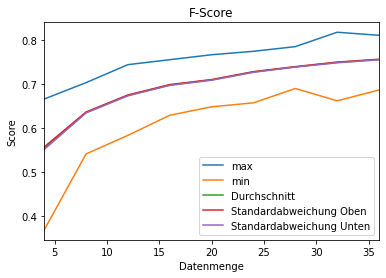

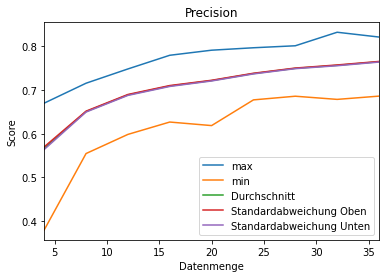

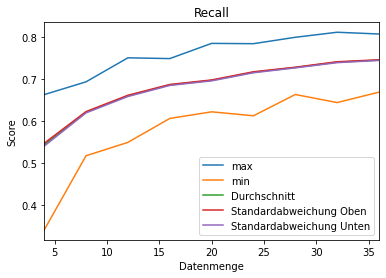

In [4]:
# Min-Max-Werte und Durchschnittswerte inkl. Standardabweichungen

xWerte = [4,8,12,16,20,24,28,32,36]
varianzPlusFScore = []
varianzMinusFScore = []
varianzPlusPrecision = []
varianzMinusPrecision = []
varianzPlusRecall = []
varianzMinusRecall = []
for i in range(len(fScores)):
    varianzPlusFScore.append(averageFScores[i] + varianzFScores[i])
    varianzMinusFScore.append(averageFScores[i] - varianzFScores[i])
    varianzPlusPrecision.append(averagePrecisions[i] + varianzPrecisions[i])
    varianzMinusPrecision.append(averagePrecisions[i] - varianzPrecisions[i])
    varianzPlusRecall.append(averageRecalls[i] + varianzRecalls[i])
    varianzMinusRecall.append(averageRecalls[i] - varianzRecalls[i])
    
plt.title('F-Score')
plt.plot(xWerte,maxFScores, label="max")
plt.plot(xWerte,minFScores, label="min")
plt.plot(xWerte,averageFScores, label="Durchschnitt")
plt.plot(xWerte,varianzPlusFScore, label="Standardabweichung Oben")
plt.plot(xWerte,varianzMinusFScore, label="Standardabweichung Unten")
plt.xlim(4,36)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.legend()
plt.show()

plt.title('Precision')
plt.plot(xWerte,maxPrecisions, label="max")
plt.plot(xWerte,minPrecisions, label="min")
plt.plot(xWerte,averagePrecisions, label="Durchschnitt")
plt.plot(xWerte,varianzPlusPrecision, label="Standardabweichung Oben")
plt.plot(xWerte,varianzMinusPrecision, label="Standardabweichung Unten")
plt.xlim(4,36)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.legend()
plt.show()

plt.title('Recall')
plt.plot(xWerte,maxRecalls, label="max")
plt.plot(xWerte,minRecalls, label="min")
plt.plot(xWerte,averageRecalls, label="Durchschnitt")
plt.plot(xWerte,varianzPlusRecall, label="Standardabweichung Oben")
plt.plot(xWerte,varianzMinusRecall, label="Standardabweichung Unten")
plt.xlim(4,36)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.legend()
plt.show()

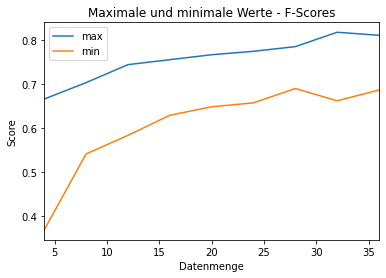

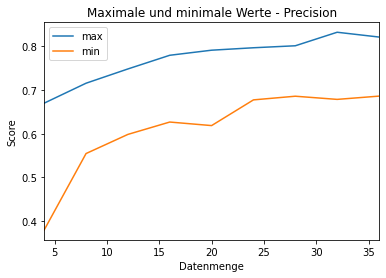

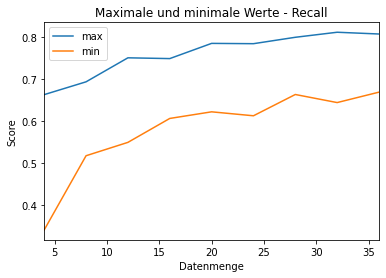

In [5]:
# Min-Max-Werte
plt.title('Maximale und minimale Werte - F-Scores')
plt.plot(xWerte,maxFScores, label="max")
plt.plot(xWerte,minFScores, label="min")
plt.xlim(4,36)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.legend()
plt.show()

plt.title('Maximale und minimale Werte - Precision')
plt.plot(xWerte,maxPrecisions, label="max")
plt.plot(xWerte,minPrecisions, label="min")
plt.xlim(4,36)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.legend()
plt.show()

plt.title('Maximale und minimale Werte - Recall')
plt.plot(xWerte,maxRecalls, label="max")
plt.plot(xWerte,minRecalls, label="min")
plt.xlim(4,36)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.legend()
plt.show()

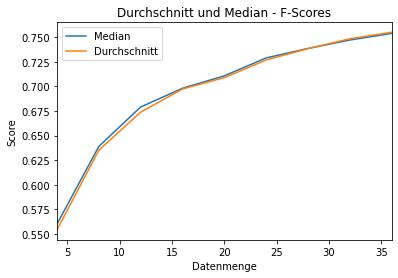

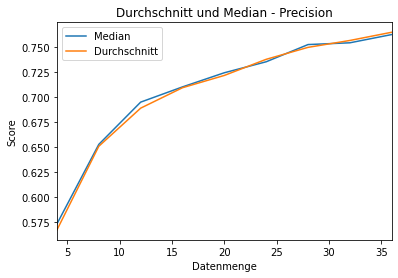

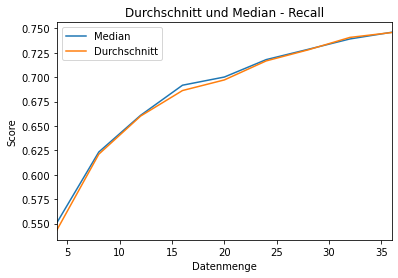

In [6]:
# Median und Durchschnittswerte 

plt.title('Durchschnitt und Median - F-Scores')
plt.plot(xWerte,mediansFScores, label="Median")
plt.plot(xWerte,averageFScores, label="Durchschnitt")
plt.xlim(4,36)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.legend()
plt.show()

plt.title('Durchschnitt und Median - Precision')
plt.plot(xWerte,mediansPrecisions, label="Median")
plt.plot(xWerte,averagePrecisions, label="Durchschnitt")
plt.xlim(4,36)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.legend()
plt.show()

plt.title('Durchschnitt und Median - Recall')
plt.plot(xWerte,mediansRecalls, label="Median")
plt.plot(xWerte,averageRecalls, label="Durchschnitt")
plt.xlim(4,36)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.legend()
plt.show()

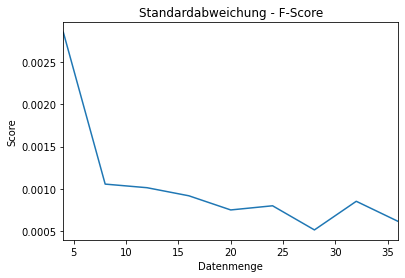

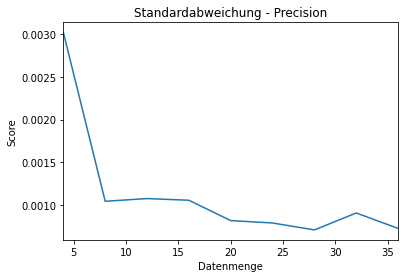

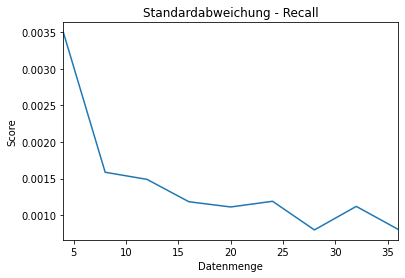

In [8]:
# Standardabweichung

plt.title('Standardabweichung - F-Score')
plt.plot(xWerte,varianzFScores)
plt.xlim(4,36)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.show()

plt.title('Standardabweichung - Precision')
plt.plot(xWerte,varianzPrecisions)
plt.xlim(4,36)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.show()

plt.title('Standardabweichung - Recall')
plt.plot(xWerte,varianzRecalls)
plt.xlim(4,36)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.show()

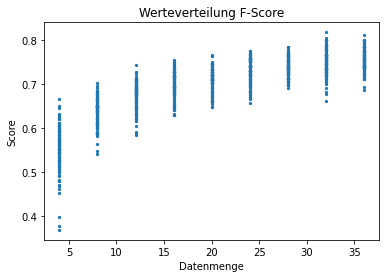

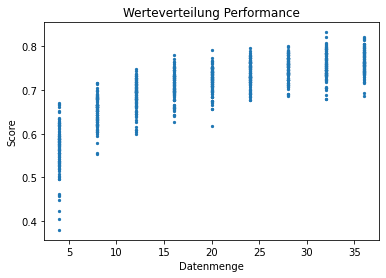

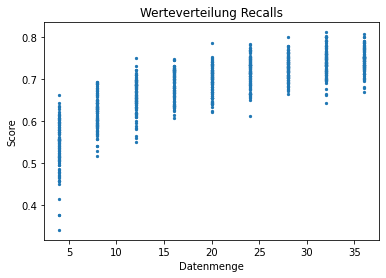

In [10]:
#Werteverteilungen

x = []
yf = []
yp = []
yr = []
for i in range(len(fScores)):
    for j in range(len(fScores[i])):
        x.append((i+1)*4)
        yf.append(fScores[i][j])
        yp.append(precisions[i][j])
        yr.append(recalls[i][j])

plt.title('Werteverteilung F-Score')
plt.scatter(x, yf, s=5)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.show()


plt.title('Werteverteilung Performance')
plt.scatter(x, yp, s=5)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.show()

plt.title('Werteverteilung Recalls')
plt.scatter(x, yr, s=5)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.show()